##                     Project 6- Pharmaceutical Sales prediction across multiple stores

### Objective

##### The objective of the project is to develop a machine learning solution that accurately predicts pharmaceutical sales across multiple stores of Rossmann Pharmaceuticals. The prediction should cover a period of six weeks ahead of time, incorporating various factors such as promotions, competition, school and state holidays, seasonality, and locality. The end product should provide reliable forecasts to assist the finance team in making informed decisions regarding resource allocation, inventory management, and strategic planning.

### Business Need

##### Rossmann Pharmaceuticals requires accurate sales forecasting to optimize its operations and maximize profitability. Currently, individual store managers rely on subjective methods for sales prediction, which may lead to inefficiencies and missed opportunities. By implementing a data-driven approach, the company aims to improve the accuracy of sales forecasts, enabling better resource allocation, inventory planning, and promotional strategies. Additionally, the centralized prediction system will provide a standardized method for forecasting across all stores, ensuring consistency and alignment with company objectives. Ultimately, the project addresses the business need for enhanced decision-making capabilities and improved operational efficiency within Rossmann Pharmaceuticals

### Libraries Used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data

Importing Store data

In [4]:
pharma_store=pd.read_csv("store.csv")

Importing Test Data

In [5]:
pharma_test=pd.read_csv("test.csv")

Importing Train Data

In [6]:
pharma_train=pd.read_csv("train.csv")

C:\Users\pooji\AppData\Local\Temp\ipykernel_3348\1355783094.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  pharma_train=pd.read_csv("train.csv")


##### Since getting Dtype error in the Promo Column, we have modified the code

In [7]:
pharma_train = pd.read_csv("train.csv", dtype={"Promo": "int64"}, low_memory=False)

In [8]:
pharma_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [9]:
pharma_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [10]:
pharma_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


### Pharma_Store data analysis

### Information about pharma_store data frame

In [11]:
pharma_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Finding the Unique values in the columns

In [12]:
pharma_store['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [13]:
pharma_store['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [14]:
pharma_store['CompetitionDistance'].unique()

array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
       2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
       1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
       2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
       2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
       2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
       1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
       4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
       7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
       2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.750e+04,
       2.200e+03, 1.650e+03, 3.300e+02, 2.244e+04, 1.996e+04, 3.510e+03,
       3.320e+03, 7.910e+03, 2.370e+03, 2.239e+04, 2.710e+03, 1.181e+04,
       1.870e+03, 4.800e+02, 5.600e+02, 1.069e+04, 

In [15]:
pharma_store['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [16]:
pharma_store['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [17]:
pharma_store['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [18]:
pharma_store['Promo2SinceYear'].unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [19]:
pharma_store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

### Finding the null values in pharma_store dataframe

In [20]:
pharma_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### Filling Missing Values

In [21]:
pharma_store['CompetitionDistance'].fillna(pharma_store['CompetitionDistance'].median())
pharma_store['CompetitionOpenSinceMonth'].fillna(value=0, inplace=True)
pharma_store['CompetitionOpenSinceYear'].fillna(value=0, inplace=True)
pharma_store['Promo2SinceWeek'].fillna(value=0, inplace=True)
pharma_store['Promo2SinceYear'].fillna(value=0, inplace=True)
pharma_store['PromoInterval'].fillna('Not Available', inplace=True)


* In the Column 'CompetitionDistance' - fills missing values with Median value
* In the Column 'CompetitionOpenSinceMonth' - fills missing values with '0'
* In the Column 'CompetitionOpenSinceYear' - fills missing values with '0'
* In the Column 'Promo2SinceWeek' - fills missing values with '0'
* In the Column 'Promo2SinceYear' - fills missing values with '0'
* In the Column 'PromoInterval' - fills missing values with 'Not Available'

* Overall handling the missing values replacing them with a meaningfull values


### Pharma_Test Data Analysis 

In [22]:
pharma_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [23]:
pharma_test['Id'].unique()

array([    1,     2,     3, ..., 41086, 41087, 41088], dtype=int64)

In [24]:
pharma_test['DayOfWeek'].unique()

array([4, 3, 2, 1, 7, 6, 5], dtype=int64)

In [25]:
pharma_test['Date'].unique()

array(['2015-09-17', '2015-09-16', '2015-09-15', '2015-09-14',
       '2015-09-13', '2015-09-12', '2015-09-11', '2015-09-10',
       '2015-09-09', '2015-09-08', '2015-09-07', '2015-09-06',
       '2015-09-05', '2015-09-04', '2015-09-03', '2015-09-02',
       '2015-09-01', '2015-08-31', '2015-08-30', '2015-08-29',
       '2015-08-28', '2015-08-27', '2015-08-26', '2015-08-25',
       '2015-08-24', '2015-08-23', '2015-08-22', '2015-08-21',
       '2015-08-20', '2015-08-19', '2015-08-18', '2015-08-17',
       '2015-08-16', '2015-08-15', '2015-08-14', '2015-08-13',
       '2015-08-12', '2015-08-11', '2015-08-10', '2015-08-09',
       '2015-08-08', '2015-08-07', '2015-08-06', '2015-08-05',
       '2015-08-04', '2015-08-03', '2015-08-02', '2015-08-01'],
      dtype=object)

In [26]:
pharma_test['Open'].unique()

array([ 1., nan,  0.])

In [27]:
pharma_test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [28]:
pharma_test['SchoolHoliday'].unique()

array([0, 1], dtype=int64)

#### Data column in Object, Converting into Datatime 

In [29]:
pharma_test['Date']=pd.to_datetime(pharma_test['Date'])

In [30]:
pharma_test['Date'].unique

<bound method Series.unique of 0       2015-09-17
1       2015-09-17
2       2015-09-17
3       2015-09-17
4       2015-09-17
           ...    
41083   2015-08-01
41084   2015-08-01
41085   2015-08-01
41086   2015-08-01
41087   2015-08-01
Name: Date, Length: 41088, dtype: datetime64[ns]>

#### Replacing 'a' with '1' (0 considered has No holiday where as 1 Considered Public Holiday)

In [31]:
pharma_test['StateHoliday']=pharma_test['StateHoliday'].replace({'a':1,'0':0})

In [32]:
pharma_test['StateHoliday'].unique()

array([0, 1], dtype=int64)

In [33]:
pharma_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  int64         
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 2.5 MB


### Finding Missing Values in pharma_test Dataset

In [34]:
pharma_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

#### Fill missing values in the 'Open' column using forward fill

In [35]:
pharma_test['Open'].fillna(method='ffill', inplace=True)

In [36]:
pharma_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Pharma_Train Data Analysis

In [37]:
pharma_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Unique value in Date- Since it is showing Dtype-Object

In [38]:
pharma_train['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

#### Convering the Object to Datetime type

In [39]:
pharma_train['Date']=pd.to_datetime(pharma_train['Date'])

#### Replacing Object to Integer (0 considered has No holiday, 1 Considered Public Holiday, 2 Considered Easter holiday, 3 Considered Chirstmas holiday)

In [40]:
pharma_train['StateHoliday']=pharma_train['StateHoliday'].replace({'0':0,'a':1,'b':2,'c':3})

In [41]:
pharma_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 69.8 MB


### Finding the Missing values in phama_train dataset

In [42]:
pharma_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

##### There is no null values in pharma_train dataset

In [43]:
pharma_store.corr().round(2)

C:\Users\pooji\AppData\Local\Temp\ipykernel_3348\399274074.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pharma_store.corr().round(2)


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.00,-0.03,-0.03,-0.01,0.01,0.01,0.01
CompetitionDistance,-0.03,1.00,-0.03,-0.00,-0.15,-0.13,-0.15
CompetitionOpenSinceMonth,-0.03,-0.03,1.00,0.79,-0.08,-0.11,-0.08
CompetitionOpenSinceYear,-0.01,-0.00,0.79,1.00,-0.10,-0.12,-0.10
Promo2,0.01,-0.15,-0.08,-0.10,1.00,0.76,1.00
Promo2SinceWeek,0.01,-0.13,-0.11,-0.12,0.76,1.00,0.76
Promo2SinceYear,0.01,-0.15,-0.08,-0.10,1.00,0.76,1.00


## Data Visualization for Pharma Store Data

### Pie Plot for Type of Stores

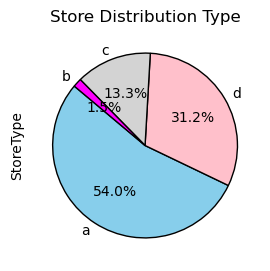

In [50]:
plt.figure(figsize=(5,3))
colors=['skyblue', 'pink', 'lightgray', 'magenta']
pie= pharma_store['StoreType'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
for patch in pie.patches:
    patch.set_edgecolor('black')
plt.title('Store Distribution Type')
plt.axis='equal'
plt.show()

##### *Interpretation*
Based on the provided pie chart and the distribution of store types:

* Store Type A accounts for the majority, with 54% of the distribution.
* Store Type B has the smallest representation, comprising only 1.5% of the total.
* Store Type C constitutes 13.3% of the distribution.
* Store Type D, which is not explicitly mentioned in the provided code but seems to be present based on the percentages provided, makes up the remaining 31.2%.

##### *Analysis*

* *Market Dominance:* Store Type A is the most prevalent, indicating it holds a significant market share, likely due to popularity or profitability.

* *Niche Focus:* Store Type B has a minimal presence, suggesting it caters to a specialized market segment or serves unique needs.

* *Market Diversity:* The presence of multiple store types shows a strategy of catering to diverse customer preferences.

* *Growth Opportunities:* Store Type D, though not explicitly mentioned, holds a substantial share, indicating an opportunity for further investment and growth.

* *Optimization:* Analyzing performance per store type can help optimize operations and resource allocation, ensuring maximum profitability.

#### *Conclusion*

In summary, understanding the distribution of store types enables strategic decisions to maintain dominance, exploit growth opportunities, and optimize operations within the pharmaceutical business.


### Count plot for Assortment Distribution 

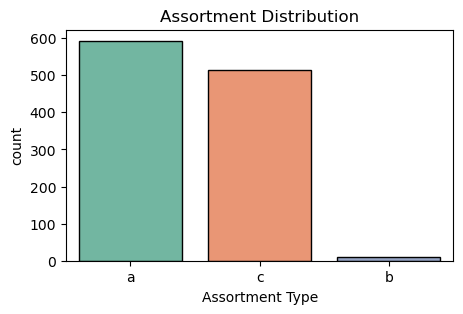

In [58]:
plt.figure(figsize=(5,3))
sns.countplot(data=pharma_store, x='Assortment', palette='Set2', edgecolor='black')
plt.title('Assortment Distribution')
plt.xlabel('Assortment Type')
plt.show()


##### *Interpretation*
Based on the provided countplot and the distribution of assortment types:

* Assortment Type a has the highest count, with approximately 600 occurrences.
* Assortment Type c follows with around 500 occurrences.
* Assortment Type b, although not explicitly specified in the provided data, seems to have a very small representation, with a bar that is above 0 but below 10 or 5, indicating minimal occurrence.


##### *Analysis*

* *Assortment Preference:* There's a preference for Assortment Type a and Type c, as they make up the majority of the distribution. This suggests that these assortments may align more closely with customer preferences or business strategies.

* *Limited Representation:* Assortment Type b, with its minimal representation, indicates that it may cater to a specialized or niche market segment, or it might not be a focus for the pharmaceutical business.

* *Strategic Implications:* Understanding the distribution of assortment types can inform inventory management, marketing strategies, and product offerings to better meet customer demands and preferences.

##### *Conclusion*
Overall, this analysis provides insight into the assortment distribution within the pharmaceutical store dataset, which can guide decision-making to optimize product assortment and enhance customer satisfaction.


### KDE Plot for Competition Distance

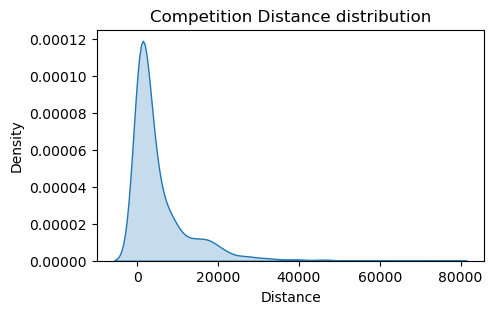

In [59]:
plt.figure(figsize=(5,3))
sns.kdeplot(pharma_store['CompetitionDistance'],fill=True)
plt.title('Competition Distance distribution')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.show()

##### *Interpretation*

Based on the KDE plot of the distribution:

* The distribution of competitor distances appears to be skewed towards lower distances, with the density peaking around 0 to approximately 15,000 meters.
* From 15,000 to 20,000 meters, the density drops significantly to around 0.00001, indicating a decrease in the frequency of competitors within this distance range.
* Beyond 20,000 meters, the density further decreases, falling below 0.00001, suggesting very few competitors exist at distances greater than 20,000 meters.

##### *Analysis* 

* *Proximity of Competitors:* The majority of competitors seem to be located within a relatively close distance of 0 to 15,000 meters, indicating a high level of competition in nearby areas.

* *Sparse Competition at Greater Distances:* As distances increase beyond 15,000 meters, the density of competitors decreases sharply. Beyond 20,000 meters, competition becomes scarce, suggesting potential opportunities for the pharmaceutical stores to expand into areas with fewer competitors.

##### *Conclusion*

Understanding the distribution of competitor distances can inform strategic decisions regarding market positioning, expansion plans, and competitive analysis within the pharmaceutical industry.


### Countplot for Promotion Distribuition by Store Type

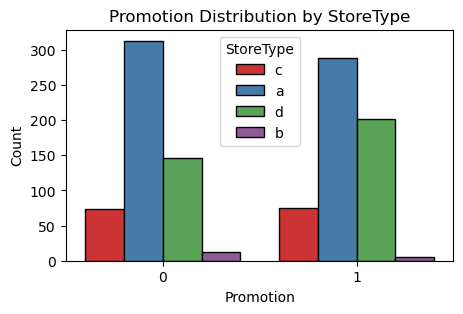

In [62]:
plt.figure(figsize=(5,3))
sns.countplot(x='Promo2', hue='StoreType', data=pharma_store, palette='Set1', edgecolor='black')
plt.title('Promotion Distribution by StoreType')
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.legend(title='StoreType')
plt.show()

##### *Interpretation*
The provided countplot illustrates the distribution of promotions (Promo2) across different store types within the pharmaceutical dataset.

* *For Promotion 0:*

Store Type A exhibits the highest participation, followed by Store Type D and Store Type C. Store Type B has the lowest participation.

* *For Promotion 1:*

Store Type A continues to have the highest participation, followed closely by Store Type D. Store Type C also shows considerable participation, albeit slightly less than Store Type A and D. Store Type B remains the least involved in promotions.

##### *Analysis*

The analysis reveals distinct patterns in promotion participation across various store types:

* *Store Type Preferences:* Store Types A and D are consistently more active in both Promotion 0 and Promotion 1, indicating a stronger inclination towards promotional activities. Store Type B consistently demonstrates the lowest participation, suggesting potential differences in marketing strategies or customer bases.

* *Promotion Effectiveness:* Understanding the varying participation levels of different store types in promotions can guide the optimization of promotional strategies. Store Types A and D, being more actively involved, might benefit from tailored promotional campaigns, while Store Types B and C might require different approaches to encourage participation.

* *Market Segmentation:* The differences in promotion participation across store types highlight potential segmentation within the pharmaceutical market. Tailoring promotions based on store type characteristics can lead to more effective targeting and allocation of resources.

##### *Conclusion*

In summary, the analysis underscores the importance of understanding the distribution of promotions across different store types to optimize promotional strategies and enhance market effectiveness within the pharmaceutical industry.


### Bar plot for Comptition Open Since Month

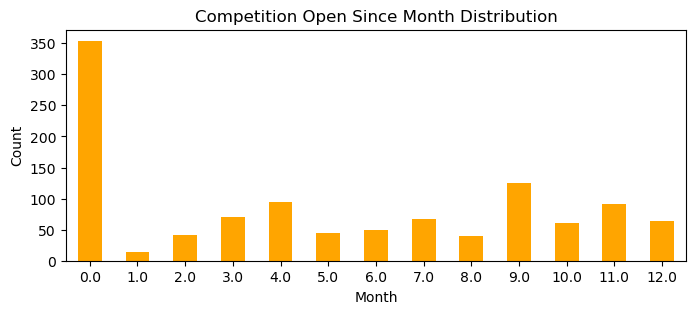

In [76]:
plt.figure(figsize=(8, 3))
pharma_store['CompetitionOpenSinceMonth'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Competition Open Since Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##### *Interpretation*

The countplot visualizes the distribution of promotional intervals (PromoInterval) within the pharmaceutical store dataset. It provides a snapshot of how frequently different promotional intervals occur.

* The majority of instances have no promotional interval, with a count of over 500.
* Promotional intervals occurring in January, April, July, and October are the next most common, with approximately 350 occurrences each.
* February, May, August, and November follow, with approximately 140 occurrences each.
* March, June, September, and December have the fewest occurrences, with around 100 each.

##### *Analysis*

*Promotional Intervals:* The data suggests that the most frequent promotional intervals occur in the months of January, April, July, and October, followed by February, May, August, and November. March, June, September, and December have the fewest instances of promotional intervals.

*Promotion Planning:* Understanding the distribution of promotional intervals can aid in planning marketing strategies and resource allocation. For instance, knowing the most common promotional months allows for better preparation and optimization of promotional campaigns during those periods.

*Seasonal Trends:* The distribution of promotional intervals may reflect seasonal trends or patterns in consumer behavior. For example, promotions may be more prevalent during certain months to coincide with holidays, seasons, or other factors affecting consumer purchasing decisions.

##### *Conclusion*

In summary, analyzing the distribution of promotional intervals provides valuable insights into the timing and frequency of promotional activities within the pharmaceutical industry, aiding in strategic decision-making and campaign planning.


### Bar plot for Copetition Open Since Year Distribution

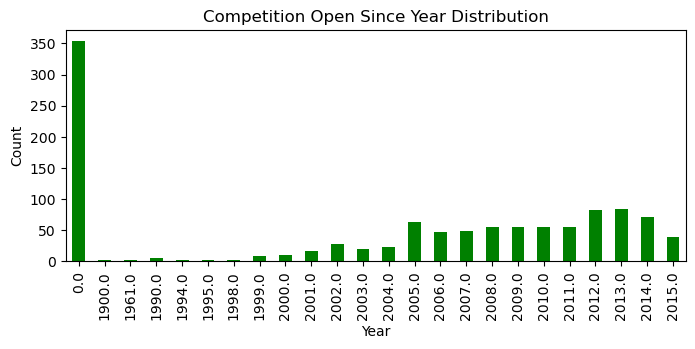

In [77]:
plt.figure(figsize=(8, 3))
pharma_store['CompetitionOpenSinceYear'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Competition Open Since Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##### *Interpretation*

The countplot visualization illustrates the distribution of "Competition Open Since Year" in a pharmaceutical store dataset. Here's how the data is distributed:

* There are 354 instances where the competition opening year is not specified (year 0).

* The years with the highest counts of competition openings are 2012 and 2013, with 82 and 83 instances respectively.
The lowest count is in the year 2003, with only 27 instances.

##### *Analysis*

* *Distribution Trends*

The data indicates a varied distribution of competition opening years, with a peak in the years 2012 and 2013. This suggests that there was a significant influx of new competition during this period.
There is a general trend of increasing competition openings from earlier years to around 2013, followed by a decline in the subsequent years.

* *Potential Implications*

High competition openings in 2012 and 2013 might indicate a period of rapid expansion or market saturation, where new competitors entered the market to capitalize on growing demand.
The decline in competition openings in the years following 2013 could imply a stabilization of the market or a slowdown in new entrants, possibly due to factors such as regulatory changes, economic conditions, or shifts in consumer preferences.

##### *Conclusion*

The analysis of competition opening years provides insights into the dynamics of the pharmaceutical market. The peak in competition openings around 2012 and 2013 suggests a period of heightened activity and possibly increased competitive pressure. However, the subsequent decline in competition openings indicates a potential shift in market dynamics or saturation.

### Histplot for Competition Open since month

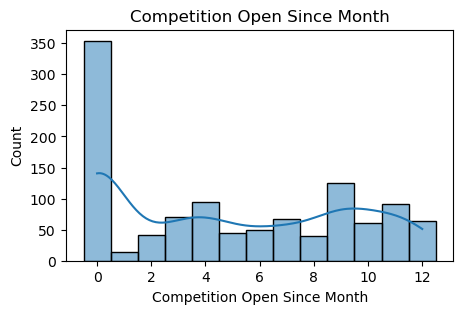

In [63]:
plt.figure(figsize=(5,3))
sns.histplot(data=pharma_store, x='CompetitionOpenSinceMonth', discrete=True, kde=True, binwidth=1)
plt.title('Competition Open Since Month')
plt.xlabel("Competition Open Since Month")
plt.show()

##### *Interpretation*

* Month 0 has the highest count of competitor openings, with approximately 354 competitors entering the market during that period.
* Other months show varying numbers of competitor openings, with Month 9 having the second-highest count at 125, followed by Month 11 with 92, Month 4 with 94, and Month 10 with 61.
* Months 1, 2, 5, 6, 7, 8, and 12 also have competitor openings, though with smaller counts ranging from 14 to 70.

##### *Analysis*

* *Competitor Entry Peaks:* Month 0 experiences the highest influx of competitor entries, suggesting a significant period of market activity or opportunity for new entrants. This may indicate favorable market conditions or strategic timing for market entry.

* *Variability Across Months:* While Month 0 stands out as the peak for competitor entries, other months also witness substantial competitor activity. Understanding the distribution across months allows for better anticipation of competitive pressures and market dynamics throughout the year.

* *Strategic Implications:* Pharmaceutical businesses can use this information to plan their market entry, expansion, and competitive response strategies. Identifying periods of heightened competition can help in allocating resources, adjusting pricing strategies, and developing marketing campaigns to maintain competitiveness.

##### *Conclusion*

In summary, analyzing the distribution of competitor opening months provides valuable insights into the competitive landscape within the pharmaceutical industry, aiding in strategic decision-making and market positioning.

### Violin Plot for Promo2 since week

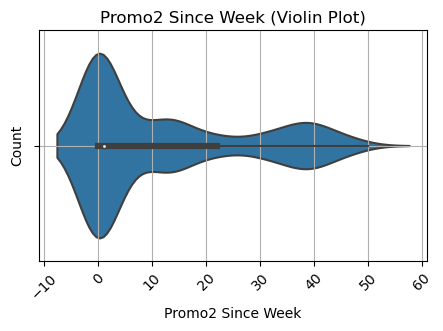

In [66]:
plt.figure(figsize=(5, 3))
sns.violinplot(data=pharma_store, x='Promo2SinceWeek')
plt.title('Promo2 Since Week (Violin Plot)')
plt.xlabel('Promo2 Since Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### *Interpretation*

* The widest part of the violins represents the density of the data, with wider areas indicating higher density.
* The thin lines extending from the violins, known as "whiskers," show the range of the data.
* Promotional activations are observed across various weeks, with different levels of density and variability.
* Weeks 0, 15, 30, and 40 have substantial occurrences of promotion, indicating these weeks are frequently chosen for promotional activities.
* Weeks 10 and 22 also show notable occurrences of promotion, albeit less than the aforementioned weeks.
* Week 27 displays some promotion occurrences but is generally less common compared to other weeks.
* Weeks 5, 37, 47, and weeks below 18 have minimal occurrences of promotion, suggesting these weeks are less favored for promotional activities.

##### *Analysis*

* *Promotional Timing:* Certain weeks, such as weeks 0, 15, 30, and 40, are more commonly chosen for promotional activities, potentially due to strategic considerations such as seasonal trends, holidays, or sales events.

* *Variability:* The distribution of promotions across different weeks indicates variability in promotional strategies, with some weeks being more favored than others.

* *Opportunities:* Understanding the distribution of promotion occurrences can help identify opportunities for optimizing promotional strategies, such as targeting underutilized weeks or adjusting promotional timing based on historical performance.

##### *Conclusion*

In summary, the detailed analysis of Promo2 activation weeks provides insights into the temporal distribution of promotional activities within the pharmaceutical dataset, guiding strategic decisions to enhance promotional effectiveness and market impact.

### Count Plot for Promo2 Since year 

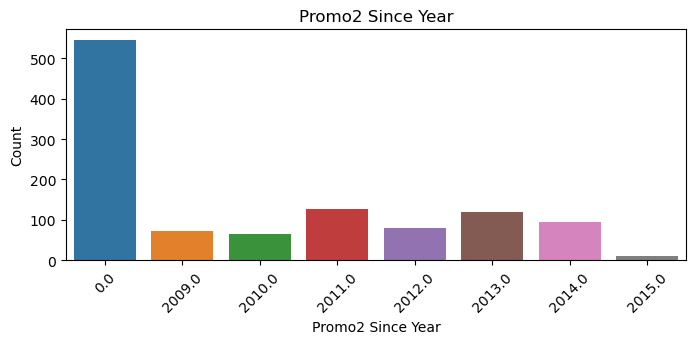

In [78]:
plt.figure(figsize=(8, 3))
sns.countplot(data=pharma_store, x='Promo2SinceYear')
plt.title('Promo2 Since Year')
plt.xlabel("Promo2 Since Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### *Interpretation*

The countplot visualization you provided displays the distribution of "Promo2 Since Year" in a pharmaceutical store dataset. 

* Distribution: The majority of stores seem to have had their Promo2 offers since the years 2011, 2013, and 2014, as these years have higher counts compared to others.

* Trend Analysis: There's a noticeable trend of increasing counts from 2009 to 2013, indicating a potential rise in the adoption of Promo2 offers during this period. However, the count decreases in 2014 and drastically drops in 2015.

##### *Analysis*

* Adoption Rate: The increase in counts from 2009 to 2013 might suggest that more stores started participating in the Promo2 offers during this time, possibly due to the effectiveness of these promotions in driving sales.

* Market Saturation: The decrease in counts in 2014 and 2015 could indicate a saturation point where most stores that could benefit from Promo2 offers were already participating, leading to fewer new adoptions in subsequent years.

* Strategy Shift: Alternatively, the drop in counts in 2015 might suggest a change in the company's marketing strategy or a decline in the effectiveness of Promo2 offers, leading to fewer stores opting for this promotion.

##### *Conclusion*

Based on the data, it seems that Promo2 offers were increasingly adopted by pharmaceutical stores from 2009 to 2013, but there was a decline in adoption in 2014 and 2015. Further investigation into the effectiveness of these promotions and market dynamics could provide valuable insights for refining promotional strategies in the future.

### Join plot for Competition distance Vs Promo2 since week

<Figure size 800x600 with 0 Axes>

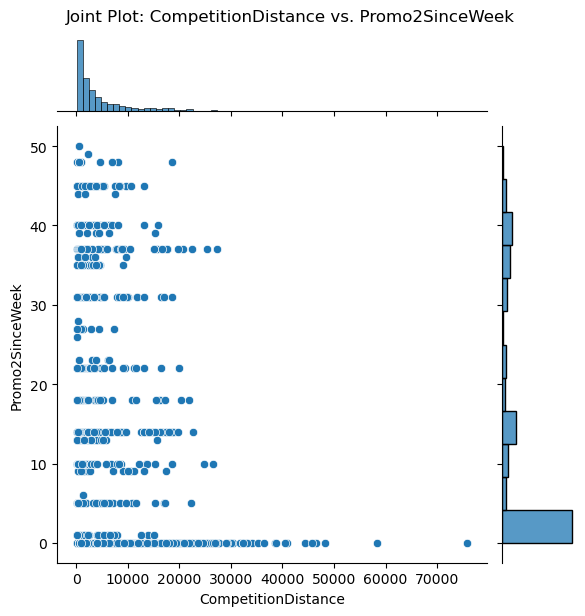

In [75]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='CompetitionDistance', y='Promo2SinceWeek', data=pharma_store, kind='scatter')
plt.suptitle('Joint Plot: CompetitionDistance vs. Promo2SinceWeek', y=1.02)
plt.show()

<Figure size 1200x800 with 0 Axes>

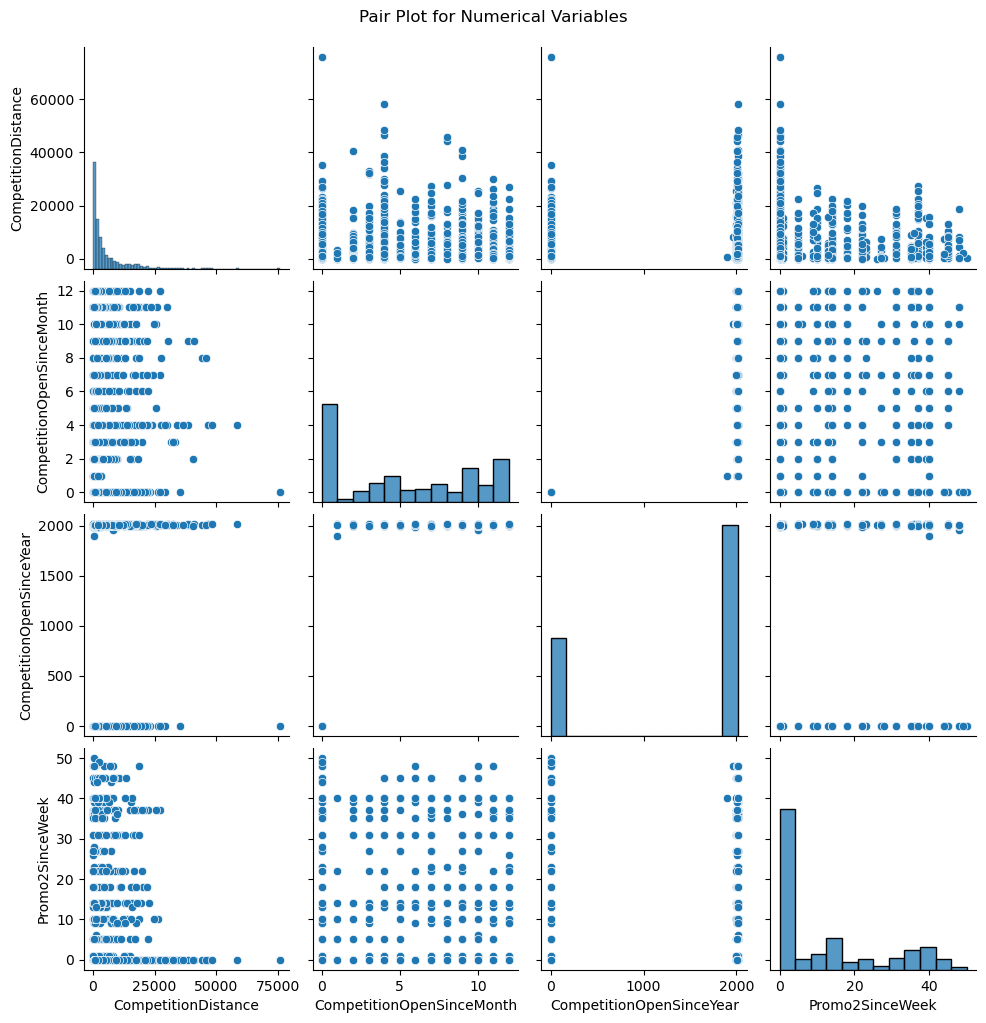

In [69]:
plt.figure(figsize=(12, 8))
sns.pairplot(pharma_store[['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek']])
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()

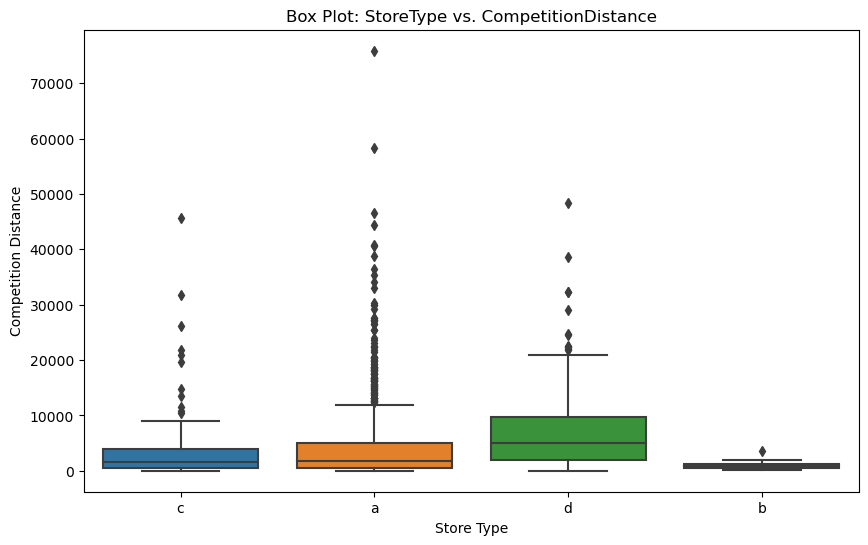

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='CompetitionDistance', data=pharma_store)
plt.title('Box Plot: StoreType vs. CompetitionDistance')
plt.xlabel('Store Type')
plt.ylabel('Competition Distance')
plt.show()

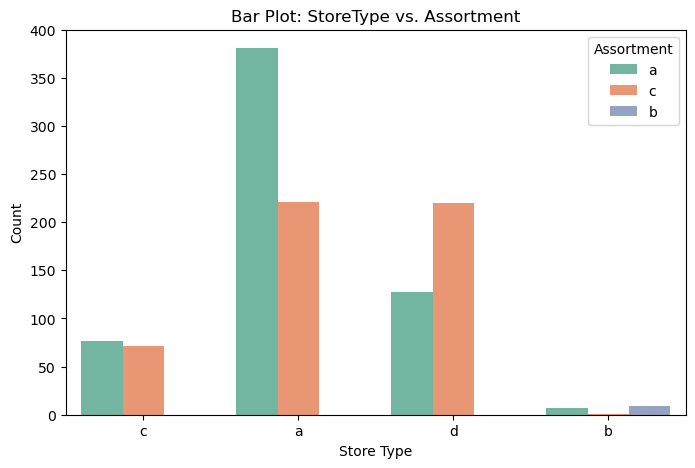

In [72]:
plt.figure(figsize=(8, 5))
sns.countplot(x='StoreType', hue='Assortment', data=pharma_store, palette='Set2')
plt.title('Bar Plot: StoreType vs. Assortment')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

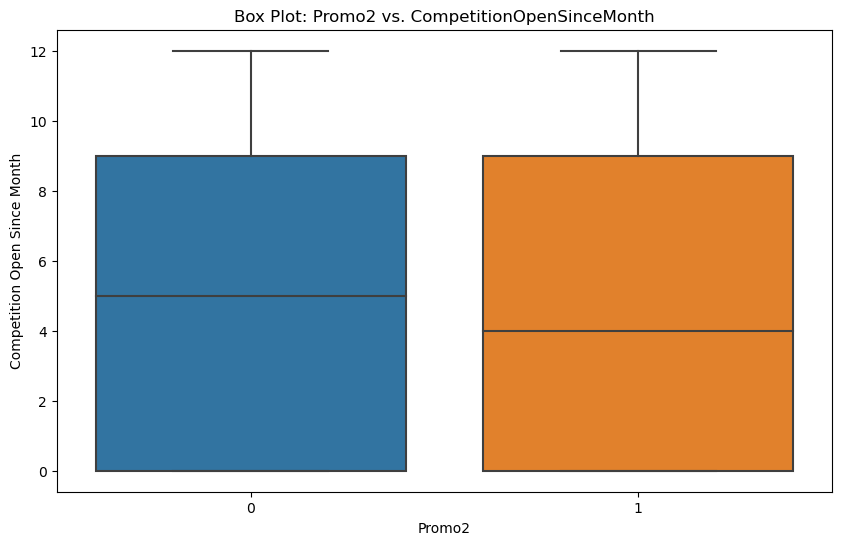

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo2', y='CompetitionOpenSinceMonth', data=pharma_store)
plt.title('Box Plot: Promo2 vs. CompetitionOpenSinceMonth')
plt.xlabel('Promo2')
plt.ylabel('Competition Open Since Month')
plt.show()

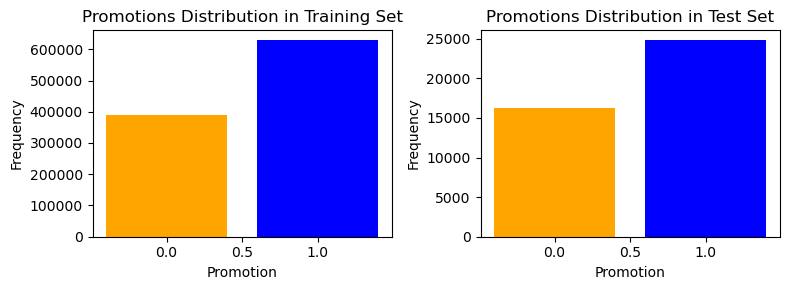

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Plot promotions distribution for training set
axes[0].bar(pharma_train['Promo'].unique(), pharma_train['Promo'].value_counts(), color=['blue', 'orange'])
axes[0].set_title('Promotions Distribution in Training Set')
axes[0].set_xlabel('Promotion')
axes[0].set_ylabel('Frequency')

# Plot promotions distribution for test set
axes[1].bar(pharma_test['Promo'].unique(), pharma_test['Promo'].value_counts(), color=['blue', 'orange'])
axes[1].set_title('Promotions Distribution in Test Set')
axes[1].set_xlabel('Promotion')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Heatmap for Pharmaceutical Store Data

C:\Users\pooji\AppData\Local\Temp\ipykernel_3348\2489553568.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pharma_store.corr())


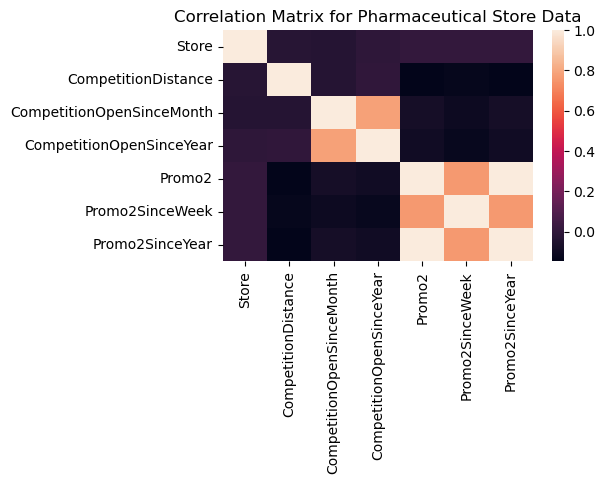

In [44]:
plt.figure(figsize=(5,3))
sns.heatmap(pharma_store.corr())
plt.title('Correlation Matrix for Pharmaceutical Store Data')
plt.show()